In [27]:
# Downloading data
!wget  -O donnees_TP1_Delires_2024.tgz https://perso.telecom-paris.fr/ladjal/donnees_TP1_Delires_2024.tgz

--2024-01-30 08:33:15--  https://perso.telecom-paris.fr/ladjal/donnees_TP1_Delires_2024.tgz
Resolving perso.telecom-paris.fr (perso.telecom-paris.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paris.fr (perso.telecom-paris.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://perso.telecom-paristech.fr/ladjal/donnees_TP1_Delires_2024.tgz [following]
--2024-01-30 08:33:16--  https://perso.telecom-paristech.fr/ladjal/donnees_TP1_Delires_2024.tgz
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309748810 (295M) [application/x-gzip]
Saving to: ‘donnees_TP1_Delires_2024.tgz’

donnees_TP1_Delires 100%[===================>] 295.40M  19.3MB/s    in 16s     

2024-01-30 08:33:33 (18.2 MB

In [28]:
#unpack the data.
#everything will be in content/Donnees_TPA_Delires_2024

!tar xvzf donnees_TP1_Delires_2024.tgz
zebres="Donnees_TP1_Delires_2024/Data/FFDNET/zebres.png"
testimage1="/content/Donnees_TP1_Delires_2024/Data/SR/testimages/img_043.png"
testimage2="/content/Donnees_TP1_Delires_2024/Data/SR/testimages/119082.png"

Donnees_TP1_Delires_2024/
Donnees_TP1_Delires_2024/Code/
Donnees_TP1_Delires_2024/Data/
Donnees_TP1_Delires_2024/Data/generic_images/
Donnees_TP1_Delires_2024/Data/FFDNET/
Donnees_TP1_Delires_2024/Data/SR/
Donnees_TP1_Delires_2024/Data/SR/testimages/
Donnees_TP1_Delires_2024/Data/SR/._Set5_x4.h5
Donnees_TP1_Delires_2024/Data/SR/Set5_x4.h5
Donnees_TP1_Delires_2024/Data/SR/._Set5_x3.h5
Donnees_TP1_Delires_2024/Data/SR/Set5_x3.h5
Donnees_TP1_Delires_2024/Data/SR/._Set5_x2.h5
Donnees_TP1_Delires_2024/Data/SR/Set5_x2.h5
Donnees_TP1_Delires_2024/Data/SR/Pretrained/
Donnees_TP1_Delires_2024/Data/SR/Pretrained/._rdn_x4.pth
Donnees_TP1_Delires_2024/Data/SR/Pretrained/rdn_x4.pth
Donnees_TP1_Delires_2024/Data/SR/Pretrained/._rdn_x2.pth
Donnees_TP1_Delires_2024/Data/SR/Pretrained/rdn_x2.pth
Donnees_TP1_Delires_2024/Data/SR/Pretrained/._rdn_x3.pth
Donnees_TP1_Delires_2024/Data/SR/Pretrained/rdn_x3.pth
Donnees_TP1_Delires_2024/Data/SR/testimages/._119082_rdn_x4.png
Donnees_TP1_Delires_2024/Data/SR/t

Through all the practical work images are to be considered as float images of values in the range [0..1]. So you will some times see some /255.

 This scaling is important when a network has been trained with images in a specfic intervalle.


In [3]:
#Common functions Usage for every part of the practical work
import numpy as np
import tempfile
import IPython
import matplotlib.pyplot as plt
import PIL.Image as pil_image

def viewimage(im, normalize=True,titre='',displayfilename=False):
   imin=im.copy().astype(np.float32)
   if normalize:
       imin-=imin.min()
       if imin.max()>0:
           imin/=imin.max()
   else:
       imin=imin.clip(0,255)/255


   imin=(imin*255).astype(np.uint8)
   filename=tempfile.mktemp(titre+'.png')
   if displayfilename:
       print (filename)
   plt.imsave(filename, imin, cmap='gray')
   IPython.display.display(IPython.display.Image(filename))

#La fonction viewimage_color est la même que viewimage. Ca a l'air de marcher
#USE ONLY viewimage
def viewimage_color(im, normalize=True,titre='',displayfilename=False):
   imin=im.copy().astype(np.float32)
   if normalize:
       imin-=imin.min()
       if imin.max()>0:
           imin/=imin.max()
   else:
       imin=imin.clip(0,255)/255


   imin=(imin*255).astype(np.uint8)
   filename=tempfile.mktemp(titre+'.png')
   if displayfilename:
       print (filename)
   plt.imsave(filename, imin, cmap='gray')
   IPython.display.display(IPython.display.Image(filename))


def read_image_from_disk(filename):
  """reads an image from the disk. """
  image = pil_image.open(filename).convert('RGB')
  imgnp=np.array(image).astype(np.float32)
  #(h,w,c)=imgnp.shape
  #imgnp=imgnp[:(h//scale)*scale,:(w//scale)*scale,:]
  return imgnp/255.0
# NOTE FOR Denoising, we only use gray images for simplicity.
def read_gray_image(filename):
  img=read_image_from_disk(filename)
  return img.sum(axis=2)/3

def norm2(X):
  return ((X**2).sum())**0.5

In [4]:
def function_to_study(y,sigma):
  if y < sigma**2:
    return 0
  else :
    return y - sigma**2

In [5]:
def plot_function(sigma):
  X_values = []
  y_values = np.linspace(0, 25, 25)
  for y in y_values:
    X_values.append(function_to_study(y,sigma))
  plt.figure(figsize=(10, 6))
  plt.plot(y_values, X_values , marker='o')

  # Adding title and labels
  plt.title("Soft Thresholding")
  plt.xlabel("Y values")
  plt.ylabel("Function values")

  # Show the plot
  plt.grid(True)
  plt.show()


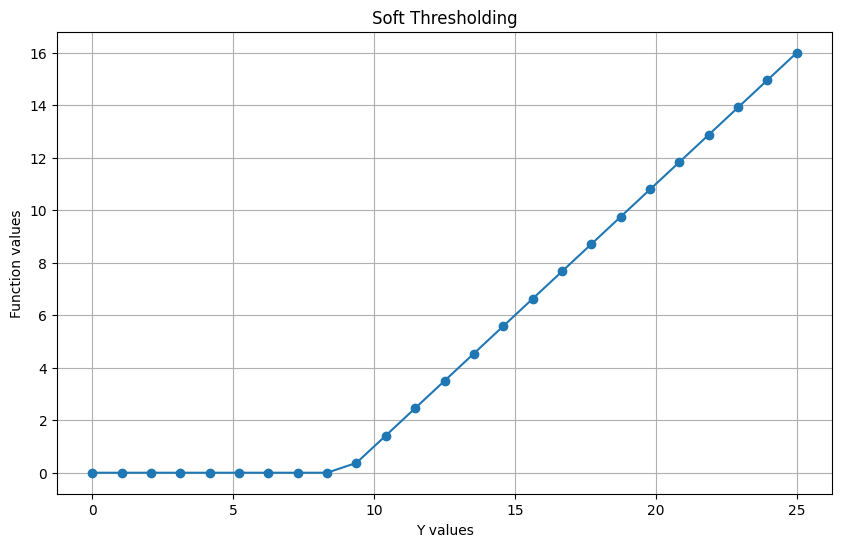

In [6]:
plot_function(3)

# DCT denoiser
The DCT denoiser is described in the model in the next cell and a cell that uses it is given

In [6]:
import torch
import torch.nn as nn
from scipy import fftpack as scifft

def To_Tensor(X):
  return torch.from_numpy(X.copy()).to(device)

def From_Tensor(X):
  return X.detach().cpu().numpy()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #POSSIBLE BUG choose other that cuda:0
print (device)


def idct2_blocks(N):
  X=np.zeros((N,N,N*N),dtype=np.float32)
  for k in range(N):
    for l in range(N):
      X[k,l,k*N+l]=1
  O=scifft.idct(X,type=2,axis=0,norm='ortho')
  O=scifft.idct(O,type=2,axis=1,norm='ortho')
  return O

class DCT_denoiser(nn.Module): #N must be odd
  def __init__(self, N=7):
    vects=idct2_blocks(N)
    W1=To_Tensor(np.expand_dims(vects,0)).to(device).permute(3,0,1,2)
    W2=To_Tensor(np.expand_dims(np.fliplr(np.flipud(vects)),0)).to(device).permute(0,3,1,2)
    super(DCT_denoiser, self).__init__()
    # First convolutional layer with 7x7 kernel and 49 features
    self.conv1 = nn.Conv2d(1, N*N, kernel_size=N, stride=1, padding='valid')
    self.conv1.weight.data = W1
    self.conv1.bias.data=torch.zeros(N*N).to(device)
    #self.relu = nn.ReLU()
    # Second convolutional layer with 1x1 kernel and 1 feature
    self.conv2 = nn.Conv2d(N*N, 1, kernel_size=7, stride=1, padding=(N-1))
    self.conv2.weight.data = W2
    self.conv2.bias.data=torch.zeros(1).to(device)
    #self.seuil=To_Tensor(s*np.ones((1),dtype=np.float32))
    self.N=N
  def get_mask(self,sh): # renvoie le mask par lequel diviser la sortie pour obtenir la vraie restauration
    N=self.N
    sigy=np.concatenate((np.arange(1,N),N*np.ones((sh[0]-2*N+2,)),np.arange(N-1,0,-1))).reshape((sh[0],1))
    sigx= np.concatenate((np.arange(1,N),N*np.ones((sh[1]-2*N+2,)),np.arange(N-1,0,-1))).reshape((1,sh[1]))
    return sigx*sigy

  def forward(self, x,s):
    # Input x should have shape (batch_size, channels, height, width)
    x = self.conv1(x)
    seuil=To_Tensor(s*np.ones((1),dtype=np.float32))
    x = torch.where(x.abs() < seuil, torch.tensor(0.0), x)
    x = self.conv2(x)
    return x

def apply_denoiser(model, img,noiselevel,ratio):
  """ takes an image, adds noise to it (noislevel), denoise it with the model
  and returne (clean, noisy, denoised)"""
  noiselevel/=255
  img=img.copy().astype(np.float32)
  noisy=img+np.random.randn(*img.shape)*noiselevel
  noisy=noisy.astype(np.float32)
  noisynet=np.expand_dims(noisy,0)
  noisynet=np.expand_dims(noisynet,0)
  noisynet=To_Tensor(noisynet)
  out=model(noisynet,ratio*noiselevel) #with mutiply noislevel by ratio to obtain te threshold
  out=From_Tensor(out)
  out=out[0,0]
  mask=model.get_mask(img.shape)
  return (img,noisy,out/mask)



cuda:0


In [7]:
#TEST DCT_denoiser.
N=7
test=zebres
img=read_gray_image(test)
my_denoiser=DCT_denoiser(N=N)



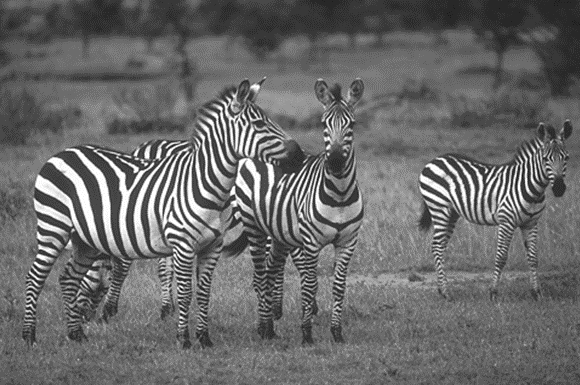

In [8]:
viewimage(img)

In [26]:
output = apply_denoiser(my_denoiser , img , 10 , 2.5 )

---

# Original Image

---

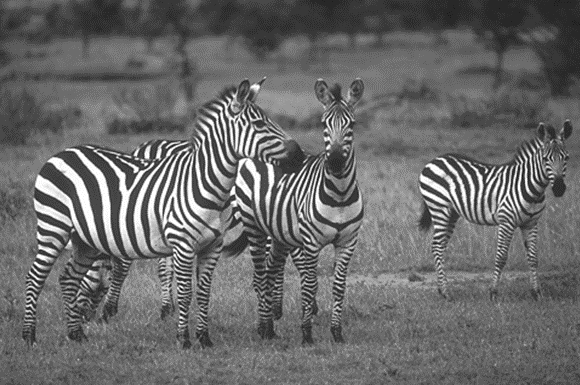

In [30]:
viewimage(output[0])

---

# NOISY IMAGE

---

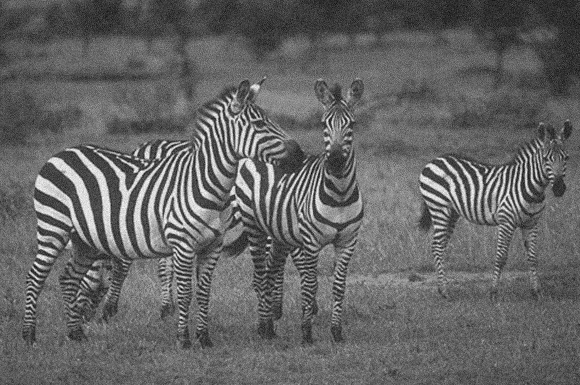

In [28]:
viewimage(output[1])

---

# DENOISED IMAGE

---

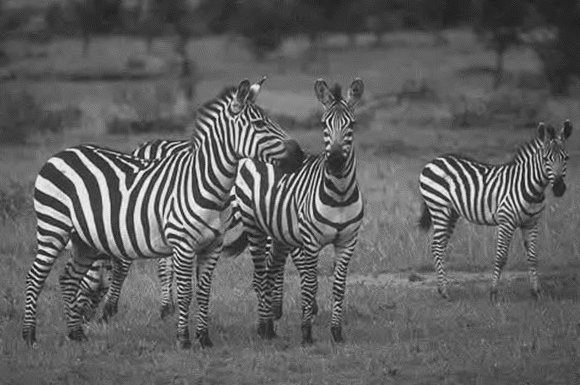

In [29]:
viewimage(output[2])

---

---

for ratio= 0.0  we have residual error =  46.3672807263576
for ratio= 0.5  we have residual error =  45.263861677418156
for ratio= 1.0  we have residual error =  39.681662409269464
for ratio= 1.5  we have residual error =  30.64396123138809
for ratio= 2.0  we have residual error =  23.20110625828799
for ratio= 2.5  we have residual error =  20.24872621653212
for ratio= 3.0  we have residual error =  20.328112300940173
for ratio= 3.5  we have residual error =  21.417776479876405
for ratio= 4.0  we have residual error =  22.69938091774748
for ratio= 4.5  we have residual error =  23.955704277621468


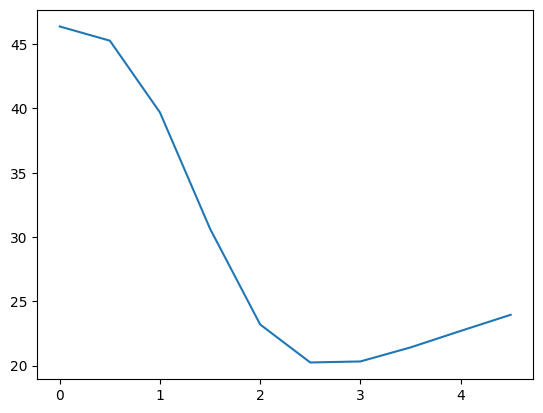

In [32]:
nl=25
ratios=np.arange(0,5,0.5)
errs=0*ratios
k=0
for ratio  in ratios:
  (CL,NOI,DENOI)=apply_denoiser(my_denoiser,img,nl,ratio)
  errs[k]=norm2(CL-DENOI)
  print ("for ratio=",ratio," we have residual error = ",norm2(CL-DENOI))
  k+=1

plt.plot(ratios,errs)

The Next sections are dedicated the the study of a more complex denoising network: FFDNET
The implementation is taken from
https://www.ipol.im/pub/art/2019/231/

The denoising is all done in grayscale, but you can easily use the provided data to have a color denoiser.
This is done to simplify comparisons and the code of the practical work.


In [9]:
import os
import argparse
import time
import numpy as np
import cv2
import torch
import torch.nn as nn
from torch.autograd import Variable

import sys
sys.path.insert(0,"/content/Donnees_TP1_Delires_2024/Code/FFDNET")
from models import FFDNet
from utils import batch_psnr, normalize, init_logger_ipol, \
                                variable_to_cv2_image, remove_dataparallel_wrapper, is_rgb

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #POSSIBLE BUG choose other that cuda:0
print (device)


cuda:0


In [10]:
# CREATION OF THE DENOINSING NETWORK



def create_ffdnet():
  model_fn="/content/Donnees_TP1_Delires_2024/Data/FFDNET/Pretrained/net_gray.pth"

  in_ch=1 # this is to be changed for rgb images
  net = FFDNet(num_input_channels=in_ch)

  if device==torch.device('cuda:0'):
    state_dict = torch.load(model_fn)
    device_ids = [0]
    model = nn.DataParallel(net, device_ids=device_ids).cuda()
    #state_dict=state_dict.to(device)
  else:
    state_dict = torch.load(model_fn, map_location='cpu')
    # CPU mode: remove the DataParallel wrapper
    state_dict = remove_dataparallel_wrapper(state_dict)
    model = net


  model.load_state_dict(state_dict)
  model.eval()
  return model

def To_Tensor(X):
  return torch.from_numpy(X).to(device)

def From_Tensor(X):
  return X.detach().cpu().numpy()

def Apply_FFDNET_model(model,im,noiselevel=25):
  """Given a perfect image, we add noise and denoise with ffdnet.
  noiselevel is given in the range 0-255
  Returns the denoised image.
  Remember the program adds noise to the image you gave.
  If you do not want any added noise run the program with noiselevel=0
  """
  # the input must be of even size
  (dy,dx)=im.shape
  ndx=dx
  ndy=dy
  if dy%2==1:
    ndy=dy+1
  if dx%2==1:
    ndx=dx+1
  imnew=np.zeros((ndy,ndx),dtype=np.float32)
  imnew[:dy,:dx]=im
  imnew[:,-1]=imnew[:,dx-1]
  imnew[-1,:]=imnew[dy-1,:]
  noiselevel/=255.0
  noiselevel=np.ones((1),dtype=np.float32)*noiselevel
  noisyimage=imnew+np.random.randn(*imnew.shape)*noiselevel
  noisyimage=np.expand_dims(noisyimage,0)
  noisyimage=np.expand_dims(noisyimage,0)
  with torch.no_grad():
    outim=model(To_Tensor(noisyimage).to(device),To_Tensor(noiselevel).to(device))

  outim=From_Tensor(outim)[0,0]
  outim=noisyimage[0,0]-outim # the model estimates the noise, not the clean image
  outim=outim[:dy,:dx] #in case even size constraint had to be enforced
  return outim




ffdnet=create_ffdnet()


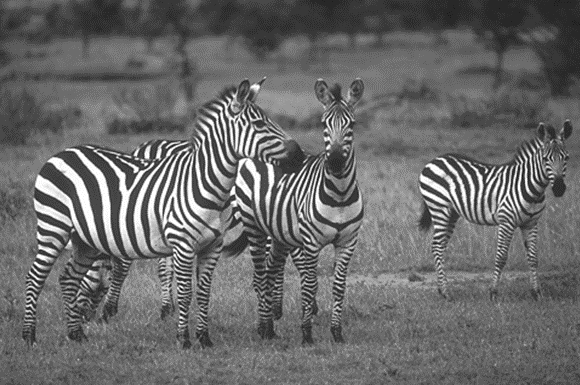

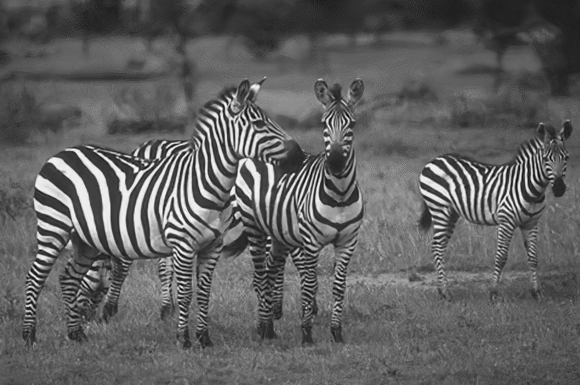

In [12]:
#Test FFDNET
testimage="/content/Donnees_TP1_Delires_2024/Data/FFDNET/zebres.png"
img=read_gray_image(testimage)
viewimage(img)
toto=Apply_FFDNET_model(ffdnet,img,noiselevel=10)
viewimage(toto)


The Next sections are dedicated to the study of a super-resolution network.
The corresponding paper is:
Zhang, Yulun, et al. "Residual dense network for image super-resolution." Proceedings of the IEEE conference on computer vision and pattern recognition. 2018.

The implementation is taken from:
https://github.com/yjn870/RDN-pytorch



In [46]:
import argparse

import torch
import torch.backends.cudnn as cudnn
import numpy as np
import PIL.Image as pil_image

import sys
sys.path.insert(0,"/content/Donnees_TP1_Delires_2024/Code/SRI/models")

from SRI.models import RDN
#from SR import convert_rgb_to_y, denormalize, calc_psnr

import tempfile
import IPython
import matplotlib.pyplot as plt



In [33]:
# tests the availability of a GPU and sets the global variable device
cudnn.benchmark = True
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #POSSIBLE BUG choose other that cuda:0
print (device)

cuda:0


In [34]:
def viewimage(im, normalize=True,titre='',displayfilename=False):
   imin=im.copy().astype(np.float32)
   if normalize:
       imin-=imin.min()
       if imin.max()>0:
           imin/=imin.max()
   else:
       imin=imin.clip(0,255)/255


   imin=(imin*255).astype(np.uint8)
   filename=tempfile.mktemp(titre+'.png')
   if displayfilename:
       print (filename)
   plt.imsave(filename, imin, cmap='gray')
   IPython.display.display(IPython.display.Image(filename))

#La fonction viewimage_color est la même que viewimage. Ca a l'air de marcher
#USE ONLY viewimage
def viewimage_color(im, normalize=True,titre='',displayfilename=False):
   imin=im.copy().astype(np.float32)
   if normalize:
       imin-=imin.min()
       if imin.max()>0:
           imin/=imin.max()
   else:
       imin=imin.clip(0,255)/255


   imin=(imin*255).astype(np.uint8)
   filename=tempfile.mktemp(titre+'.png')
   if displayfilename:
       print (filename)
   plt.imsave(filename, imin, cmap='gray')
   IPython.display.display(IPython.display.Image(filename))


def read_image_from_disk(filename):
  """reads an image from the disk. """
  image = pil_image.open(filename).convert('RGB')
  imgnp=np.array(image).astype(np.float32)
  #(h,w,c)=imgnp.shape
  #imgnp=imgnp[:(h//scale)*scale,:(w//scale)*scale,:]
  return imgnp/255.0

def apply_model(model,input, scale=2,subsampling_type="bicubic"):
  """ prepares an image to be scaled up. Returns the  (O,S,ZB,ZM)
  input is a [h,w,c] numpy array
  O= original image with size multpile of scale so that zoomed images can be compared
    to the original image
  S= subsampled image subsample(O)
  ZB= zoomed image with bicubic (zoom_bicubic(subsample(O)))
  ZM= zoomed image with model (zoom_model(subsample(O)))
  subsample_type: if "bicubic" then the subsampling of the original paper
                 is kept. if "decim" one pixel each scal pixels is kept.
            """

  (h,w,c)=input.shape
  input=input[:(h//scale)*scale,:(w//scale)*scale,:]
  if subsampling_type=="decim":
    S=input[::scale,::scale,:]
  if subsampling_type=="locmean":
    S=input[::scale,::scale,:]*0
    for k in range(scale):
      for l in range(scale):
        S+=input[k::scale,l::scale,:]
    S/=scale*scale
  if subsampling_type=="bicubic":
    #convert to PILLOW image
    pilim=pil_image.fromarray((input*255).astype(np.uint8))
    #subsample using PIL BICUBIC
    lr = pilim.resize((pilim.width // scale, pilim.height // scale),
                      resample=pil_image.BICUBIC)


    #back to numpy image
    S=np.array(lr).astype(np.float32)/255
  ZB=pil_image.fromarray((S*255).astype(np.uint8))
  ZB=ZB.resize((ZB.width*scale,ZB.height*scale),resample=pil_image.BICUBIC)
  ZB=np.array(ZB).astype(np.float32)/255
  lrmodel=np.expand_dims(S.transpose([2, 0, 1]), 0)
  lrmodel=torch.from_numpy(lrmodel).to(device)
  with torch.no_grad():
    preds=model(lrmodel ).squeeze(0)
  ZM=preds.permute(1, 2, 0).cpu().numpy()
  return (input,S,ZB,ZM)


def RDN_model(scale=2):
  """This function retruns an RDN model that scales images by
  a factor given as a parameter. """

  if scale==2:
    weightsfile="/content/Donnees_TP1_Delires_2024/Data/SR/Pretrained/rdn_x2.pth"
  if scale==3:
    weightsfile="/content/Donnees_TP1_Delires_2024/Data/SR/Pretrained/rdn_x3.pth"
  if scale==4:
    weightsfile="/content/Donnees_TP1_Delires_2024/Data/SR/Pretrained/rdn_x4.pth"

  model = RDN(scale_factor=scale,
                num_channels=3,
                num_features=64,
                growth_rate=64,
                num_blocks=16,
                num_layers=8).to(device)
  state_dict = model.state_dict()
  for n, p in torch.load(weightsfile, map_location=lambda storage, loc: storage).items():
      if n in state_dict.keys():
        state_dict[n].copy_(p)
      else:
        raise KeyError(n)

  model.eval()
  return model


672 1024 3


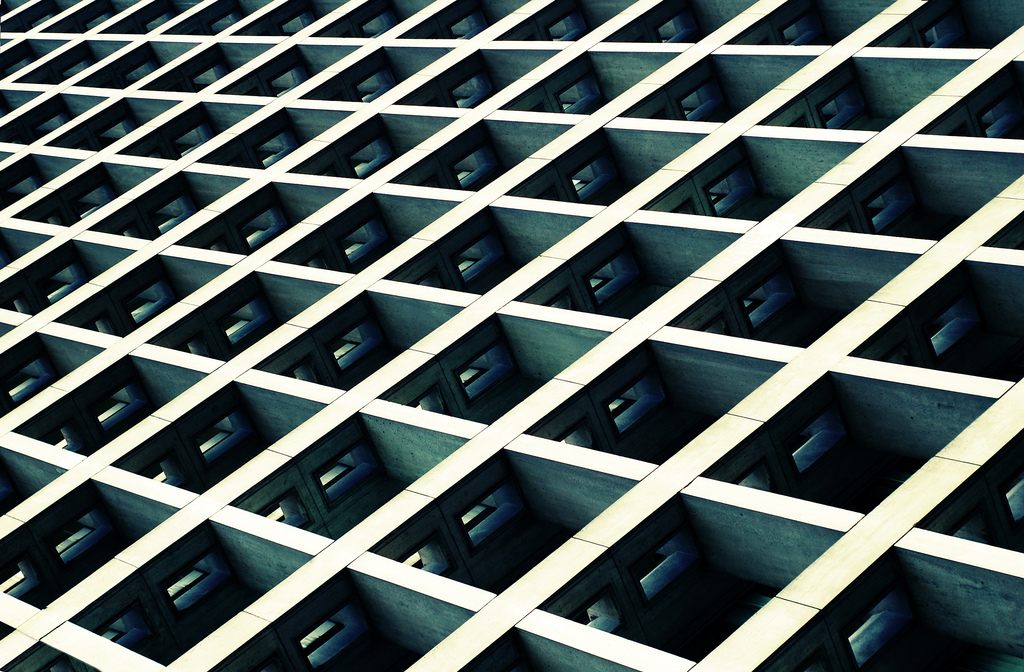

In [52]:
sca=2
model2=RDN_model(scale=sca)
testimage1="/content/Donnees_TP1_Delires_2024/Data/SR/testimages/img_043.png"
testimage2="/content/Donnees_TP1_Delires_2024/Data/SR/testimages/119082.png"
img=read_image_from_disk(testimage1)
(h,w,c)=img.shape
print (h,w,c)
viewimage(img)


In [59]:
scale_2_image =apply_model(model2,img, scale=2,subsampling_type="bicubic")

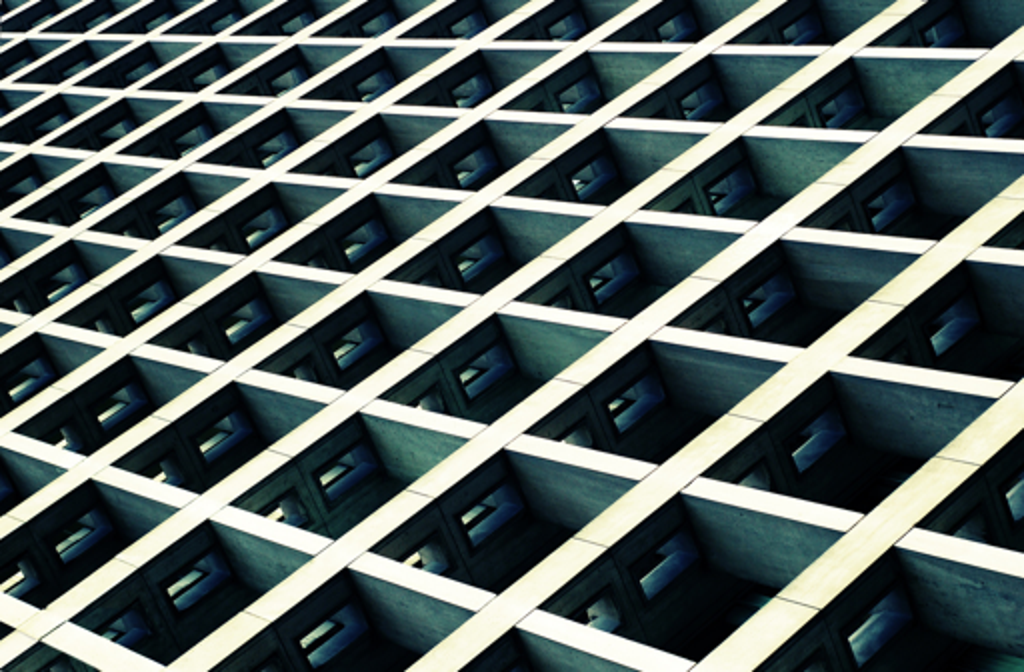

In [60]:
viewimage(scale_2_image[2])

In [58]:
viewimage(scale_2_image[3])